## Developer: Andre Kim Scarton 

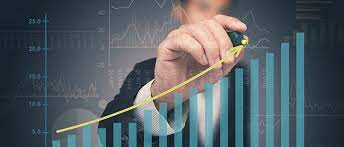

### Context
Company wants to have a dashboard with key sales metrics.
Knowing the amount of products and total value sold, history of products sold and the total value sold etc...

### Business problem
* 1 – Know the amount of products sold by the seller and segmented by the product group
* 2 – Total amount sold by the seller and segmented by the product group
* 3 – History of the amount of products sold by the seller and segmented by the product group
* 3 - History of the total value sold by the seller and segmented by the product group
* 4 – Assess the seller’s goal
* 5 – Number of products sold and total value sold by companies
* 6 – Distribution of products by vendor

* 7 - Sales forecast - objective is to build a predictive model and forecast sales of each product per employee, where this will help in optimization and inventory, costs, encourage products that have amis tickets to increase revenue




# Data preparation

In [ ]:
# Installing CatBoost package
! pip install catboost 

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Loading Dataset
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/Maua/Análise de Dados/Tabela_total.xlsx')
df.head()

,Month,Sales Org,Country of goods received,Intercompany,CardCode,CardName,Material group (WAGR),ItemCode,BA,Dscription,Qty STM,Value STM,TP2,Order intake QTY,Order intake Value,Representative,Stage of shipment,OI cost of sales,Invoiced cost of sales,Customer no. (Ship-to Party),Customer name (Ship-to party),Postal code sold to party,City sold to party,Postal code ship to party,City ship to party,CalENDerday,Belegnummer Auftrag,Belegnummer Rechnung,Meta
0,1.202,1690,BR,NaN,20290742,Metrohm Brasil Instrumentação Análitica Ltda.,WBFBN,PRACTUM612-1OBR,Lab Weighing,Laboratory balance 610g_ 10mg,0,0.0,NaN,1,3018.40,1690-15,NaN,NaN,NaN,20290742,Metrohm Brasil Instrumentação Análitica Ltda.,05007-030,São Paulo,05007-030,São Paulo,2020-01-08,1.016934e+09,NaN,1000000
1,1.202,1690,BR,NaN,20290829,Refinaria de Petroleo Riograndense S/A,LF000,11301--47------N,Lab Filtration,"CN membrane, 8 µm, 47 mm, 100 pcs",0,0.0,NaN,4,1028.35,1690-36,NaN,NaN,NaN,20290829,Refinaria de Petroleo Riograndense S/A,96202-900,Rio Grande,96202-900,Rio Grande,2020-01-02,1.016934e+09,NaN,1000000
2,1.202,1690,BR,NaN,20291089,Leco Instrumentos LTDA,WBDBO,QUINTIX224-1OBR,Lab Weighing,"Laboratory balance 220g_ 0,1mg",0,0.0,NaN,1,10611.15,1690-20,NaN,NaN,NaN,20291089,Leco Instrumentos LTDA,22281-080,Rio de Janeiro,22281-080,Rio de Janeiro,2020-01-02,1.016934e+09,NaN,1000000
3,1.202,1690,BR,NaN,20291830,Althaia S.A. Industria Farmacêutica,MB022,14055--47------N,Microbiology,"NKS Standard TTC, meio de cultura desidratado,...",0,0.0,NaN,5,1901.33,1690-2,NaN,NaN,NaN,20291830,Althaia S.A. Industria Farmacêutica,12952-820,Atibaia,05564-000,São Paulo,2020-01-02,1.016934e+09,NaN,1000000
4,1.202,1690,BR,NaN,20291830,Althaia S.A. Industria Farmacêutica,MB022,14075--47------N,Microbiology,"NKS Cetrimide, meio de cultura, estéreis cx c/...",0,0.0,NaN,3,1445.11,1690-2,NaN,NaN,NaN,20291830,Althaia S.A. Industria Farmacêutica,12952-820,Atibaia,05564-000,São Paulo,2020-01-02,1.016934e+09,NaN,1000000


In [ ]:
# Description of the variables
  # Month = Month referring to the sale
  # Sales Org = Code referring to the organization
  # Country of goods received = Country of goods received
  # Intercompany = Intercompany
  # CardCode = Code referring to the customer (Company where it was sold)
  # CardName = Name of the company that made the sale
  # Material group (WAGR) = Material group
  # ItemCode = Product code
  # BA = Material group (Macro)
  # Dscription = Product name
  # Qty STM = Quantity of products sold
  # Value STM = Total sale price
  # TP2
  # Order intake QTY = Order Placed
  # Order intake Value = Placed Value
  # Representative = Representative
  # Stage of shipment = Shipment Stage
  # OI cost of sales = Cost of sale (See what OL is)
  # Invoiced cost of sales = Invoiced cost of sales
  # Customer no. (Ship-to Party) = Customer No. of (Sender)
  # Customer name (Ship-to party) = Customer name (sender)
  # Postal code sold to party = Postal code sold separately
  # City sold to party = City sold per part
  # Postal code ship to party = Postal code sent separately
  # City ship to party = City where the product was shipped
  # CalENDerday = Day of the product on sale
  # Belegnummer Auftrag
  # Belegnummer Rechnung

In [ ]:
# Collecting dataframe information
# We can see that it contains 3543 rows and 29 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3544 entries, 0 to 3543
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Month                          3544 non-null   float64       
 1   Sales Org                      3544 non-null   int64         
 2   Country of goods received      3544 non-null   object        
 3   Intercompany                   3 non-null      float64       
 4   CardCode                       3544 non-null   int64         
 5   CardName                       3544 non-null   object        
 6   Material group (WAGR)          3544 non-null   object        
 7   ItemCode                       3544 non-null   object        
 8   BA                             3544 non-null   object        
 9   Dscription                     3544 non-null   object        
 10  Qty STM                        3544 non-null   int64         
 11  Value STM        

In [ ]:
# Creating a different dataframe to be manipulated
df1 = df

## Análise de missings

In [ ]:
# Checking the number of nulls in the dataframe (%) per column
# We can verify that enough columns are null, for that we can remove these columns so as not to disturb the analysis
df1.isnull().sum(axis=0)/df1.shape[0] 

Month                            0.000000
Sales Org                        0.000000
Country of goods received        0.000000
Intercompany                     0.999153
CardCode                         0.000000
CardName                         0.000000
Material group (WAGR)            0.000000
ItemCode                         0.000000
BA                               0.000000
Dscription                       0.000000
Qty STM                          0.000000
Value STM                        0.000000
TP2                              1.000000
Order intake QTY                 0.000000
Order intake Value               0.000000
Representative                   0.000000
Stage of shipment                1.000000
OI cost of sales                 1.000000
Invoiced cost of sales           1.000000
Customer no. (Ship-to Party)     0.000000
Customer name (Ship-to party)    0.000000
Postal code sold to party        0.000000
City sold to party               0.000564
Postal code ship to party        0

In [ ]:
# Deleting columns that are more than 20% missing
df1 = df1.drop(columns=['Intercompany','TP2','Stage of shipment','OI cost of sales','Invoiced cost of sales','Belegnummer Auftrag','Belegnummer Rechnung'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3544 entries, 0 to 3543
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Month                          3544 non-null   float64       
 1   Sales Org                      3544 non-null   int64         
 2   Country of goods received      3544 non-null   object        
 3   CardCode                       3544 non-null   int64         
 4   CardName                       3544 non-null   object        
 5   Material group (WAGR)          3544 non-null   object        
 6   ItemCode                       3544 non-null   object        
 7   BA                             3544 non-null   object        
 8   Dscription                     3544 non-null   object        
 9   Qty STM                        3544 non-null   int64         
 10  Value STM                      3544 non-null   float64       
 11  Order intake QTY 

In [ ]:
df1.describe()

,Month,Sales Org,CardCode,Qty STM,Value STM,Order intake QTY,Order intake Value,Meta
count,3544.000000,3544.0,3.544000e+03,3544.000000,3544.000000,3544.000000,3544.000000,3544.0
mean,2.631740,1690.0,2.665714e+07,2.212754,1950.236497,2.409707,2153.799444,1000000.0
std,1.097364,0.0,2.167292e+07,7.963712,14949.042660,17.547863,9811.280480,0.0
min,1.202000,1690.0,1.189000e+03,-30.000000,-35011.660000,0.000000,0.000000,1000000.0
25%,1.202000,1690.0,2.029148e+07,0.000000,0.000000,0.000000,0.000000,1000000.0
50%,2.202000,1690.0,2.029215e+07,0.000000,0.000000,0.500000,0.000000,1000000.0
75%,3.202000,1690.0,2.030515e+07,2.000000,1048.437500,2.000000,1084.700000,1000000.0
max,4.202000,1690.0,1.000442e+08,200.000000,760500.660000,953.000000,255000.010000,1000000.0


In [ ]:
# Checking the number of nulls in the dataframe (%) per line (Year and Month)
xlinha = df1.isnull().sum(axis=1)/df1.shape[1]
xlinha

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3539    0.0
3540    0.0
3541    0.0
3542    0.0
3543    0.0
Length: 3544, dtype: float64

In [ ]:
#Creating a column in the dataframe with the percentage of nulls per row (Year and Month)
df1['n_missing_linha_mes_ano'] = xlinha.values

In [ ]:
df1.head()

,Month,Sales Org,Country of goods received,CardCode,CardName,Material group (WAGR),ItemCode,BA,Dscription,Qty STM,Value STM,Order intake QTY,Order intake Value,Representative,Customer no. (Ship-to Party),Customer name (Ship-to party),Postal code sold to party,City sold to party,Postal code ship to party,City ship to party,CalENDerday,Meta,n_missing_linha_mes_ano
0,1.202,1690,BR,20290742,Metrohm Brasil Instrumentação Análitica Ltda.,WBFBN,PRACTUM612-1OBR,Lab Weighing,Laboratory balance 610g_ 10mg,0,0.0,1,3018.40,1690-15,20290742,Metrohm Brasil Instrumentação Análitica Ltda.,05007-030,São Paulo,05007-030,São Paulo,2020-01-08,1000000,0.0
1,1.202,1690,BR,20290829,Refinaria de Petroleo Riograndense S/A,LF000,11301--47------N,Lab Filtration,"CN membrane, 8 µm, 47 mm, 100 pcs",0,0.0,4,1028.35,1690-36,20290829,Refinaria de Petroleo Riograndense S/A,96202-900,Rio Grande,96202-900,Rio Grande,2020-01-02,1000000,0.0
2,1.202,1690,BR,20291089,Leco Instrumentos LTDA,WBDBO,QUINTIX224-1OBR,Lab Weighing,"Laboratory balance 220g_ 0,1mg",0,0.0,1,10611.15,1690-20,20291089,Leco Instrumentos LTDA,22281-080,Rio de Janeiro,22281-080,Rio de Janeiro,2020-01-02,1000000,0.0
3,1.202,1690,BR,20291830,Althaia S.A. Industria Farmacêutica,MB022,14055--47------N,Microbiology,"NKS Standard TTC, meio de cultura desidratado,...",0,0.0,5,1901.33,1690-2,20291830,Althaia S.A. Industria Farmacêutica,12952-820,Atibaia,05564-000,São Paulo,2020-01-02,1000000,0.0
4,1.202,1690,BR,20291830,Althaia S.A. Industria Farmacêutica,MB022,14075--47------N,Microbiology,"NKS Cetrimide, meio de cultura, estéreis cx c/...",0,0.0,3,1445.11,1690-2,20291830,Althaia S.A. Industria Farmacêutica,12952-820,Atibaia,05564-000,São Paulo,2020-01-02,1000000,0.0


In [ ]:
# Analyzing which records have some missing data
df1.loc[df1['n_missing_linha_mes_ano'] > 0 ]

,Month,Sales Org,Country of goods received,CardCode,CardName,Material group (WAGR),ItemCode,BA,Dscription,Qty STM,Value STM,Order intake QTY,Order intake Value,Representative,Customer no. (Ship-to Party),Customer name (Ship-to party),Postal code sold to party,City sold to party,Postal code ship to party,City ship to party,CalENDerday,Meta,n_missing_linha_mes_ano
88,1.202,1690,BR,20294700,Instituto de Tecnologia e Desen. Econom. e So...,WBCBO,QUINTIX125D-1OBR,Lab Weighing,Lab Balance 60_120 g_ 0.01 _0.1 mg,0,0.0,1,13095.0,1690-32,20294700,Instituto de Tecnologia e Desen. Econom. e So...,86061-335,NaN,86061-335,NaN,2020-01-15,1000000,0.090909
732,1.202,1690,BR,20294700,Instituto de Tecnologia e Desen. Econom. e So...,WBCBO,QUINTIX125D-1OBR,Lab Weighing,Lab Balance 60_120 g_ 0.01 _0.1 mg,1,13095.0,0,0.0,1690-32,20294700,Instituto de Tecnologia e Desen. Econom. e So...,86061-335,NaN,86061-335,NaN,2020-01-17,1000000,0.090909


## Outliers 

In [ ]:
df2 = df1[['Qty STM','Value STM',]]

In [ ]:
# Performing the z-score transformation with the dataframe that we manipulated with the media
df_z_score = df2.apply(stats.zscore)
df_z_score.head()

,Qty STM,Value STM
0,-0.277894,-0.130477
1,-0.277894,-0.130477
2,-0.277894,-0.130477
3,-0.277894,-0.130477
4,-0.277894,-0.130477


In [ ]:
# Creating a dataframe with the columns and rows (year and month) that had a z-score above 3
z_score_maior_3 = df_z_score[df_z_score.iloc[:,0:2] > 3]

In [ ]:
df_index = z_score_maior_3.dropna(how='all')

In [ ]:
index = df_index.index
index

Int64Index([ 447,  604,  625,  656,  657,  665,  675,  690,  754,  755,  756,
             757,  759,  760,  761,  783,  810,  812,  924, 1430, 1508, 1512,
            1577, 1635, 1693, 1741, 1747, 2368, 2447, 2464, 2515, 2524, 2530,
            2533, 2543, 2556, 2614, 2624, 2637, 2639, 2662, 2684, 2691, 3142,
            3203, 3208, 3309, 3356, 3368, 3370, 3393, 3418, 3438, 3471],
           dtype='int64')

In [ ]:
# Records that had outliers with z-score > 3
df1.iloc[index]

,Month,Sales Org,Country of goods received,CardCode,CardName,Material group (WAGR),ItemCode,BA,Dscription,Qty STM,Value STM,Order intake QTY,Order intake Value,Representative,Customer no. (Ship-to Party),Customer name (Ship-to party),Postal code sold to party,City sold to party,Postal code ship to party,City ship to party,CalENDerday,Meta,n_missing_linha_mes_ano
447,1.202,1690,BR,20292149,Fundação Butantan,WMC1,84JMP01,Services Lab Essentials,Calibração RBC micropipeta automática mecânica...,153,8421.56,0,0.0,1690-13,20292149,Fundação Butantan,05503-000,São Paulo,05503-000,São Paulo,2020-01-17,1000000,0.0
604,1.202,1690,BR,20322428,Labtalc Materiais e Serviços para Laboratorios...,MB000,11406--47----ACN,Microbiology,"Filtro de membrana de nitrato de celulose, est...",30,2649.60,0,0.0,1690-33,20322428,Labtalc Materiais e Serviços para Laboratorios...,13073-076,Campinas,13073-076,Campinas,2020-01-08,1000000,0.0
625,1.202,1690,BR,20291553,St. Jude Medical Brasil LTDA,MB034,16D01--10-H6--TG,Microbiology,Microsart filter 100. Pacote com 24 unidades,36,14664.21,0,0.0,1690-24,20291553,St. Jude Medical Brasil LTDA,31310-260,Belo Horizonte,31310-260,Belo Horizonte,2020-01-09,1000000,0.0
656,1.202,1690,BR,20292449,Fresenius Medical Care Ltda.,MB000,11406Z-47----SCM,Microbiology,"Filtro de Membrana de nitrato de celulose, est...",30,11926.42,0,0.0,1690-30,20292449,Fresenius Medical Care Ltda.,13820-000,Jaguariúna,13820-000,Jaguariúna,2020-01-13,1000000,0.0
657,1.202,1690,BR,20292449,Fresenius Medical Care Ltda.,MB000,11406Z-47----SCM,Microbiology,"Filtro de Membrana de nitrato de celulose, est...",30,11926.42,0,0.0,1690-30,20292449,Fresenius Medical Care Ltda.,13820-000,Jaguariúna,13820-000,Jaguariúna,2020-01-13,1000000,0.0
665,1.202,1690,BR,20292145,Fundação de Amparo a Pesquisa do Estado de São...,WV127,790352,Liquid Handling,Refil com ponteiras de 350 ul (10x96),40,5604.72,0,0.0,1690-39,20292145,Fundação de Amparo a Pesquisa do Estado de São...,05468-901,São Paulo,05468-901,São Paulo,2020-01-13,1000000,0.0
675,1.202,1690,BR,20322428,Labtalc Materiais e Serviços para Laboratorios...,MB000,11406--47----ACN,Microbiology,"Filtro de membrana de nitrato de celulose, est...",50,4416.00,0,0.0,1690-33,20322428,Labtalc Materiais e Serviços para Laboratorios...,13073-076,Campinas,13073-076,Campinas,2020-01-14,1000000,0.0
690,1.202,1690,BR,20292093,Ceva Veterinária Ltda,PCB21,5232707H1----P,Filtration,Cartucho filtrante Sartobran P. Membrana em Ac...,30,25634.62,0,0.0,1690-24,20292093,Ceva Veterinária Ltda,35675-000,Juatuba,35675-000,Juatuba,2020-01-15,1000000,0.0
754,1.202,1690,BR,20291662,Bionovis S.A. ­ Companhia Brasileira de Biotec...,PF62,16389-001,Fluid Management,"Holder para tubos de 3/8 ID + 5/8 OD, fornecid...",7,49515.02,0,0.0,1690-3,20291662,Bionovis S.A. ­ Companhia Brasileira de Biotec...,13278-530,Valinhos,13278-530,Valinhos,2020-01-22,1000000,0.0
755,1.202,1690,BR,20291662,Bionovis S.A. ­ Companhia Brasileira de Biotec...,PF62,16389-002,Fluid Management,Holder para BioWelder TC para tubos de 1/2pol ...,7,49515.02,0,0.0,1690-3,20291662,Bionovis S.A. ­ Companhia Brasileira de Biotec...,13278-530,Valinhos,13278-530,Valinhos,2020-01-22,1000000,0.0


In [ ]:
# Creating a dataframe with the columns and rows (year and month) that had z-score below -3
z_score_menor_3 = df_z_score[df_z_score.iloc[:,0:24] < -3]

In [ ]:
z_score_menor_3.dropna(how='all')

,Qty STM,Value STM
3537,-4.045513,NaN


In [ ]:
# Records that had outliers with z-score < 3
df1.iloc[[3537]]

,Month,Sales Org,Country of goods received,CardCode,CardName,Material group (WAGR),ItemCode,BA,Dscription,Qty STM,Value STM,Order intake QTY,Order intake Value,Representative,Customer no. (Ship-to Party),Customer name (Ship-to party),Postal code sold to party,City sold to party,Postal code ship to party,City ship to party,CalENDerday,Meta,n_missing_linha_mes_ano
3537,4.202,1690,BR,20292257,HNK BR Bebidas LTDA.,MB000,11406--47----ACN,Microbiology,"Filtro de membrana de nitrato de celulose, est...",-30,-3015.08,0,0.0,1690-30,20292257,HNK BR Bebidas LTDA.,13312-900,Itu,68795-000,Benevides,2020-04-13,1000000,0.0


## Boxplot

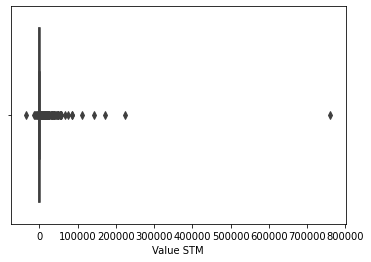

In [ ]:
sns.boxplot(x=df1['Value STM'])

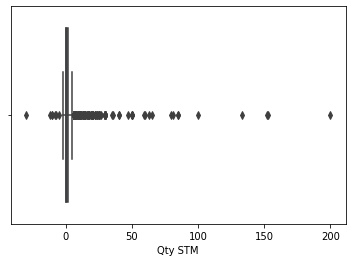

In [ ]:
sns.boxplot(x=df1['Qty STM'])

## Análise Exploratória

In [ ]:
# How many customers do we have in the base?
df1["CardCode"].nunique()

549

In [ ]:
# How many products do we have in the base ?
df1["ItemCode"].nunique()

646

In [ ]:
# How many products were sold in total?
df1['Qty STM'].sum()

7842

In [ ]:
# What is the total amount sold?
df1['Value STM'].sum()

6911638.14408

In [ ]:
# How many representatives are on the base?
df1['Representative'].nunique()

25

In [ ]:
# Which group had the greatest relevance?
x = df1['BA'].value_counts().head(10).index
y = df1["BA"].value_counts().head(10).values
fig = go.Figure([go.Bar(x=x, y=y)])
fig.show()

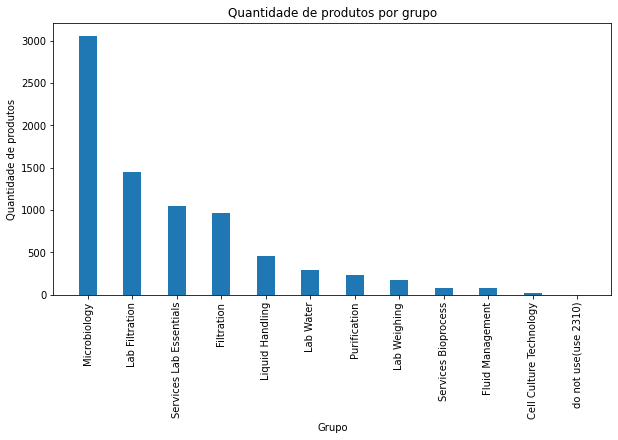

In [ ]:
# Which Group had the most products sold?
df_groupby2 = df1.groupby("BA", as_index= False).agg({"Qty STM": "sum"}).sort_values("Qty STM", ascending=False)
x = list(df_groupby2["BA"])
y = list(df_groupby2["Qty STM"])
fig = plt.figure(figsize = (10,5))
plt.bar(x,y,width=0.4)
plt.xticks(rotation=90)
plt.xlabel("Grupo")
plt.ylabel("Quantidade de produtos")
plt.title("Quantidade de produtos por grupo")
plt.show()

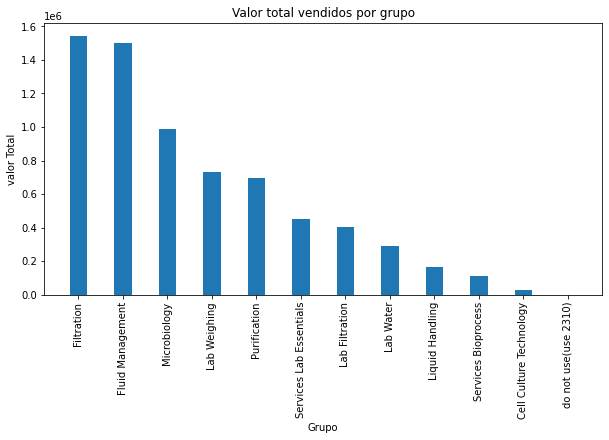

In [ ]:
# Which Group had the highest sales value?
df_groupby2 = df1.groupby("BA", as_index= False).agg({"Value STM": "sum"}).sort_values("Value STM", ascending=False)
x = list(df_groupby2["BA"])
y = list(df_groupby2["Value STM"])
fig = plt.figure(figsize = (10,5))
plt.bar(x,y,width=0.4)
plt.xticks(rotation=90)
plt.xlabel("Grupo")
plt.ylabel("valor Total")
plt.title("Valor total vendidos por grupo")
plt.show()

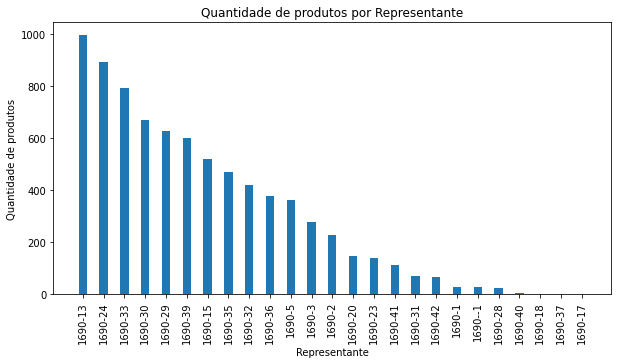

In [ ]:
# Which Representative had the most products sold?
df_groupby2 = df1.groupby("Representative", as_index= False).agg({"Qty STM": "sum"}).sort_values("Qty STM", ascending=False)
x = list(df_groupby2["Representative"])
y = list(df_groupby2["Qty STM"])
fig = plt.figure(figsize = (10,5))
plt.bar(x,y,width=0.4)
plt.xticks(rotation=90)
plt.xlabel("Representante")
plt.ylabel("Quantidade de produtos")
plt.title("Quantidade de produtos por Representante")
plt.show()

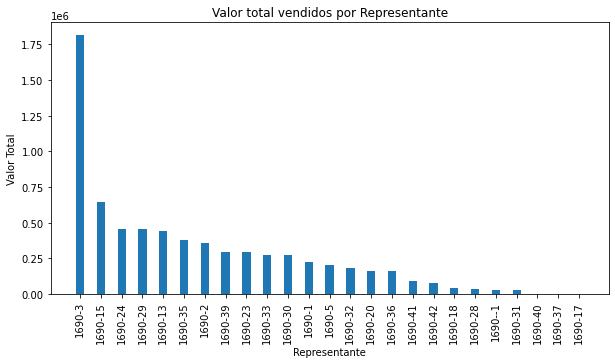

In [ ]:
# Which Representative had the highest sales value?
df_groupby2 = df1.groupby("Representative", as_index= False).agg({"Value STM": "sum"}).sort_values("Value STM", ascending=False)
x = list(df_groupby2["Representative"])
y = list(df_groupby2["Value STM"])
fig = plt.figure(figsize = (10,5))
plt.bar(x,y,width=0.4)
plt.xticks(rotation=90)
plt.xlabel("Representante")
plt.ylabel("Valor Total")
plt.title("Valor total vendidos por Representante")
plt.show()

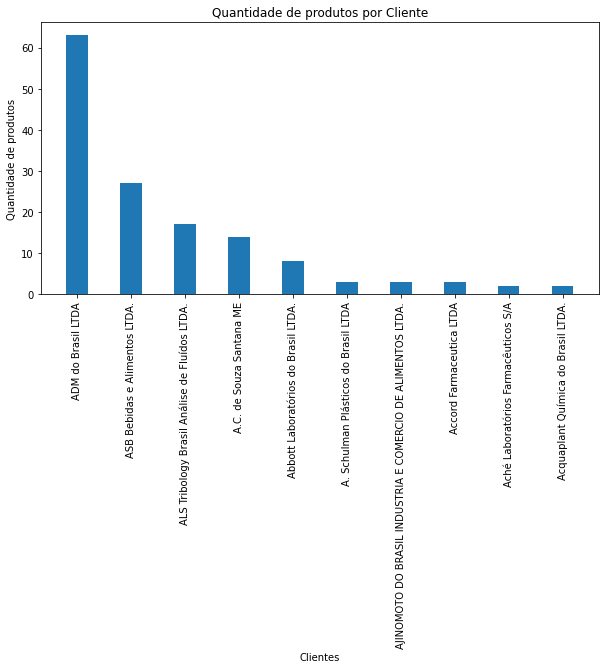

In [ ]:
# Which Customer had the most products sold?
df_groupby2 = df1.groupby("CardName", as_index= False).agg({"Qty STM": "sum"}).head(10).sort_values("Qty STM", ascending=False)
x = list(df_groupby2["CardName"])
y = list(df_groupby2["Qty STM"])
fig = plt.figure(figsize = (10,5))
plt.bar(x,y,width=0.4)
plt.xticks(rotation=90)
plt.xlabel("Clientes")
plt.ylabel("Quantidade de produtos")
plt.title("Quantidade de produtos por Cliente")
plt.show()

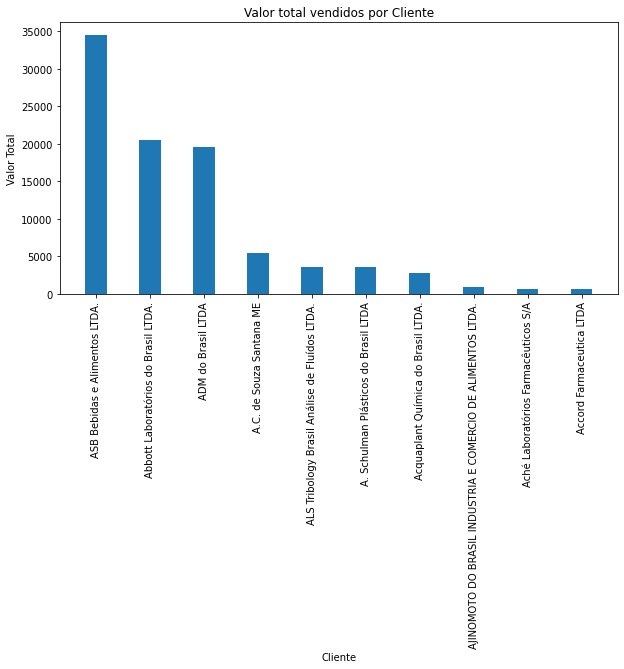

In [ ]:
# Which Representative had the highest sales value?
df_groupby2 = df1.groupby("CardName", as_index= False).agg({"Value STM": "sum"}).head(10).sort_values("Value STM", ascending=False)
x = list(df_groupby2["CardName"])
y = list(df_groupby2["Value STM"])
fig = plt.figure(figsize = (10,5))
plt.bar(x,y,width=0.4)
plt.xticks(rotation=90)
plt.xlabel("Cliente")
plt.ylabel("Valor Total")
plt.title("Valor total vendidos por Cliente")
plt.show()

# Catboost Modeling
Catboost is an open source machine learning algorithm. It can easily integrate with Deep Learning frameworks such as Google's Tensor FLow and Apple's Core ML. It can work with a variety of data types to help solve a wide range of issues facing businesses today. To complete it, it is one of the ones that offers the best precision in the class (TARGET)

The name "Catboost" comes from two words "cat egory" and "Boost ing"
The library works well with many categories of cat data, such as audio, text, image, including historical data.

"Boost" comes from the gradient boost machine learning algorithm as this library is based on the gradient boost library. Gradient boosting is a powerful machine learning algorithm that is widely applied to various types of business challenges like fraud detection, recommendation items, forecasting and also performs well. It can also return very good results with relatively less data, unlike DL models that need to learn from a large amount of data.  


# Advantages of Catboost library
* Performance: CatBoost provides state-of-the-art results and is competitive with
any leading machine learning algorithm performance front. handling categorical features automatically. We can use CatBoost without any explicit pre-processing to convert categories to numbers. CatBoost converts vategorical values ​​to numbers using various statistics on combinations of categorical features and combinations of categorical and numeric features

* Robust: reduces the need for hyperparameter tuning and decreases the chances of overfitting, which leads to more generalized models. Although, CatBoost has several parameters to adjust and contains parameters such as the number of trees, learning rate, regularization, tree depth, fold size, bagging temperature and others.


The catBoost library can be used to solve classification and regression challenges. for classification you can use CatBoostClassifier and for regression CatBoostRegressor
Furthermore, CatBoost does not require converting the dataset to any specific format, such as XGBoost and LightGBM.

# Data processing

In [ ]:
# Transforming the "Date" Field (String format) to datetime
# Creating Year, Month, Day, Week fields
df1 = df.copy()
df1['CalENDerday'] =  pd.to_datetime(df1['CalENDerday'], format='%Y-%m-%d')
df1['Ano'] = df1["CalENDerday"].dt.year
df1["Mes"] = df1["CalENDerday"].dt.month
df1["Dia"] = df1["CalENDerday"].dt.day
df1["Semana"] = df1["CalENDerday"].dt.weekday

In [ ]:
# Renaming columns
df1.columns = \
['Month', 
 'Sales_Org', 'Country_of_goods received', 'Intercompany',
       'CardCode', 'CardName', 'Material_group_(WAGR)', 'ItemCode', 'BA',
       'Dscription', 'Qty_STM', 'Value_STM', 'TP2', 'Order_intake_QTY',
       'Order_intake_Value', 'Representative', 'Stage_of_shipment',
       'OI_cost_of_sales', 'Invoiced_cost_of_sales',
       'Customer_no_(Ship_to_Party)', 'Customer_name_(Ship_to_party)',
       'Postal_code_sold_to_party', 'City_sold_to_party',
       'Postal_code_ship_to_party', 'City_ship_to_party', 'CalENDerday',
       'Belegnummer_Auftrag', 'Belegnummer_Rechnung', 'Meta ', 'Ano', 'Mes',
       'Dia', 'Semana']

In [ ]:
# Creating a variable with total value (total sum sold + sum ordered)
df1['value_total'] = df1['Value_STM'] + df1['Order_intake_Value']

In [ ]:
df1.head()

,Month,Sales_Org,Country_of_goods received,Intercompany,CardCode,CardName,Material_group_(WAGR),ItemCode,BA,Dscription,Qty_STM,Value_STM,TP2,Order_intake_QTY,Order_intake_Value,Representative,Stage_of_shipment,OI_cost_of_sales,Invoiced_cost_of_sales,Customer_no_(Ship_to_Party),Customer_name_(Ship_to_party),Postal_code_sold_to_party,City_sold_to_party,Postal_code_ship_to_party,City_ship_to_party,CalENDerday,Belegnummer_Auftrag,Belegnummer_Rechnung,Meta,Ano,Mes,Dia,Semana,value_total
0,1.202,1690,BR,NaN,20290742,Metrohm Brasil Instrumentação Análitica Ltda.,WBFBN,PRACTUM612-1OBR,Lab Weighing,Laboratory balance 610g_ 10mg,0,0.0,NaN,1,3018.40,1690-15,NaN,NaN,NaN,20290742,Metrohm Brasil Instrumentação Análitica Ltda.,05007-030,São Paulo,05007-030,São Paulo,2020-01-08,1.016934e+09,NaN,1000000,2020,1,8,2,3018.40
1,1.202,1690,BR,NaN,20290829,Refinaria de Petroleo Riograndense S/A,LF000,11301--47------N,Lab Filtration,"CN membrane, 8 µm, 47 mm, 100 pcs",0,0.0,NaN,4,1028.35,1690-36,NaN,NaN,NaN,20290829,Refinaria de Petroleo Riograndense S/A,96202-900,Rio Grande,96202-900,Rio Grande,2020-01-02,1.016934e+09,NaN,1000000,2020,1,2,3,1028.35
2,1.202,1690,BR,NaN,20291089,Leco Instrumentos LTDA,WBDBO,QUINTIX224-1OBR,Lab Weighing,"Laboratory balance 220g_ 0,1mg",0,0.0,NaN,1,10611.15,1690-20,NaN,NaN,NaN,20291089,Leco Instrumentos LTDA,22281-080,Rio de Janeiro,22281-080,Rio de Janeiro,2020-01-02,1.016934e+09,NaN,1000000,2020,1,2,3,10611.15
3,1.202,1690,BR,NaN,20291830,Althaia S.A. Industria Farmacêutica,MB022,14055--47------N,Microbiology,"NKS Standard TTC, meio de cultura desidratado,...",0,0.0,NaN,5,1901.33,1690-2,NaN,NaN,NaN,20291830,Althaia S.A. Industria Farmacêutica,12952-820,Atibaia,05564-000,São Paulo,2020-01-02,1.016934e+09,NaN,1000000,2020,1,2,3,1901.33
4,1.202,1690,BR,NaN,20291830,Althaia S.A. Industria Farmacêutica,MB022,14075--47------N,Microbiology,"NKS Cetrimide, meio de cultura, estéreis cx c/...",0,0.0,NaN,3,1445.11,1690-2,NaN,NaN,NaN,20291830,Althaia S.A. Industria Farmacêutica,12952-820,Atibaia,05564-000,São Paulo,2020-01-02,1.016934e+09,NaN,1000000,2020,1,2,3,1445.11


In [ ]:
 df_algo = df1.groupby(["Ano","Mes","Representative","ItemCode","CardName",'Material_group_(WAGR)',"BA","City_ship_to_party"]).value_total.sum().reset_index(name='value_total')

In [ ]:
x = df_algo.drop(['value_total'],axis=1)
y = df_algo.value_total

In [ ]:
x_train, x_validation, y_train, y_validation = train_test_split(x,y,train_size=0.7,random_state=7)
categorical_features_indices = np.where(x.dtypes != np.float)[0]

# Creation of the Predictive Machine





In [ ]:
model = CatBoostRegressor(iterations=50,depth=3,learning_rate=0.1,loss_function="RMSE")

model.fit(x_train,y_train,cat_features = categorical_features_indices, eval_set=(x_validation,y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 25341.8495185	test: 23215.9674660	best: 23215.9674660 (0)	total: 48ms	remaining: 2.35s
1:	learn: 25060.2519071	test: 22813.7758383	best: 22813.7758383 (1)	total: 49.6ms	remaining: 1.19s
2:	learn: 24903.3167152	test: 22593.7672396	best: 22593.7672396 (2)	total: 51ms	remaining: 799ms
3:	learn: 24714.2952160	test: 22429.8036506	best: 22429.8036506 (3)	total: 52.3ms	remaining: 602ms
4:	learn: 24606.3478938	test: 22356.5623290	best: 22356.5623290 (4)	total: 53.4ms	remaining: 481ms
5:	learn: 24490.1532859	test: 22318.4959222	best: 22318.4959222 (5)	total: 54.5ms	remaining: 400ms
6:	learn: 24423.1636219	test: 22217.4069744	best: 22217.4069744 (6)	total: 55.8ms	remaining: 343ms
7:	learn: 24324.3271990	test: 22091.2572892	best: 22091.2572892 (7)	total: 57ms	remaining: 299ms
8:	learn: 24283.2623196	test: 22032.0129520	best: 22032.0129520 (8)	total: 58ms	remaining: 264ms
9:	learn: 24199.4894097	test: 21929.6954031	best: 21929.6954031 (9)	total: 59ms	remaining: 236ms
10:	learn: 24108.227

# Evaluation of the Predictive Machine

In [ ]:
# making predictions with training datapredict_train = model.predict(x_train)
print('\nItem_out_slaes on training data',predict_train)


Item_out_slaes on training data [4024.58930303 1635.12673695 8235.17284727 ...  902.173375   3545.08393425
 1042.38275385]


In [ ]:
# Calculating predictions with training data
rmse_train = mean_squared_error(y_train,predict_train)**(0.5)
print('\nRMSE on train dataset:',rmse_train)


RMSE on train dataset: 23878.588511296482


In [ ]:
# Making predictions with test data 
predict_test = model.predict(x_validation)
print('\nItem_out_slaes on training data',predict_test)

In [ ]:
# Calculating predictions with test datarmse_test = mean_squared_error(y_validation,predict_test)**(0.5)
print('\nRMSE on train dataset:',rmse_test)


RMSE on train dataset: 20701.514945225594
